In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt 
import os
import seaborn as sns

In [2]:
chile_df = pd.read_csv('data_clean/chile_clean.csv')
argentina_df = pd.read_csv('data_clean/argentina_clean.csv')
antartica_df = pd.read_csv('data_clean/antartica_clean.csv')

# ¿Qué diferencias y similitudes existen en la biodiversidad fósil entre estas regiones a lo largo de diferentes eras geológicas?


### Enfoque y Objetivo

En este análisis, buscamos explorar la biodiversidad fósil en Chile, Argentina y Antartica utilizando índices de biodiversidad a lo largo de diferentes eras geológicas. 
El objetivo es comparar la diversidad a tres niveles taxonómicos:
1. **Especies**
2. **Géneros**
3. **Familias**

Este enfoque nos permitirá:
- Identificar cómo cambian los patrones de diversidad entre niveles taxonómicos.
- Detectar eras con alta o baja biodiversidad en términos de riqueza y equitatividad.
- Explorar si los patrones observados a nivel de especies se mantienen en niveles taxonómicos más amplios.

Utilizaremos **índices de biodiversidad** como:

### **Índice de Shannon**
$$ H' = -\sum_{i=1}^S p_i \ln(p_i) $$

- $H'$: Índice de Shannon (la medida de diversidad).
- $S$: Número total de grupos (por ejemplo, especies, géneros o familias).
- $p_i$: Proporción de individuos del grupo $i$ en relación al total. Se calcula como:
  $$ p_i = \frac{n_i}{N} $$

- $n_i$: Número de individuos en el grupo $i$.
- $N$: Número total de individuos en la comunidad.

---

- Mide la diversidad combinando **riqueza** (cantidad de grupos) y **equitatividad** (distribución de los individuos entre los grupos).
- Valores más altos indican mayor diversidad y equitatividad.

| **Índice de Shannon** | **Significado**                                                                 |
|------------------------|---------------------------------------------------------------------------------|
| **0**                 | No hay diversidad (solo hay un grupo, por ejemplo, una sola especie).           |
| **1-2**               | Baja diversidad, dominada por unas pocas especies (grupos).                     |
| **3-4**               | Diversidad moderada; hay más grupos y una mejor distribución entre ellos.        |
| **5 o más**           | Alta diversidad; hay una gran cantidad de grupos y están distribuidos uniformemente. |

---

### **Índice de Simpson**

$$ D = 1 - \sum_{i=1}^S p_i^2 $$

- $D$: Índice de Simpson (la medida de diversidad).
- $S$: Número total de grupos (por ejemplo, especies, géneros o familias).
- $p_i$: Proporción de individuos del grupo $i$ en relación al total. Se calcula como:
  $$ p_i = \frac{n_i}{N} $$

- $n_i$: Número de individuos en el grupo $i$.
- $N$: Número total de individuos en la comunidad.
---
- Mide la **probabilidad de que dos individuos seleccionados al azar pertenezcan al mismo grupo**.
- A diferencia de Shannon, es más sensible a la **dominancia** de unos pocos grupos. Valores altos reflejan **menos dominancia** y mayor equitatividad.

| **Índice de Simpson** | **Significado**                                                                 |
|------------------------|---------------------------------------------------------------------------------|
| **0**                 | Total dominancia; todos los individuos pertenecen a un solo grupo.              |
| **0.1-0.4**           | Baja equitatividad; dominancia de unos pocos grupos.                            |
| **0.5-0.7**           | Moderada equitatividad; cierta dominancia, pero con más grupos presentes.        |
| **0.8 o más**         | Alta equitatividad; las especies (grupos) están distribuidas uniformemente.      |

---

### Estructura del Análisis

1. **Calcular índices de biodiversidad**:
   Aplicaremos los índices a las eras con mayor riqueza para especies, géneros y familias.
2. **Visualizar resultados**:
   Compararemos los índices entre niveles taxonómicos y eras.
3. **Interpretar patrones**:
   Discutiremos cómo los patrones de biodiversidad varían a lo largo del tiempo y entre niveles taxonómicos.

---


## Chile 



In [3]:
#En primer lugar para el analisis taxonomico dropearemos aquellas filas que tengan valores nulos en la columna species_name, genus y family

chile_df.dropna(subset=['species_name', 'genus', 'family'], inplace=True)

In [4]:
# Seleccionar las top 5 eras con más especies únicas
top5_chile_especies = chile_df.groupby('era_early')['species_name'].nunique().nlargest(5)

# Mostrar las top 5 eras
print("Top 5 eras por especies únicas en Chile:")
print(top5_chile_especies)


Top 5 eras por especies únicas en Chile:
era_early
Neogene       459
Jurassic      425
Cretaceous    316
Quaternary    155
Triassic       98
Name: species_name, dtype: int64


## Cálculo de Índices de Biodiversidad

A continuación, calcularemos los índices de biodiversidad **Shannon** y **Simpson** para las top 5 eras seleccionadas en Chile a cada nivel taxonómico (especies, géneros y familias).


In [5]:
from scipy.stats import entropy

# Función para calcular índices de biodiversidad
def calcular_indices(df, eras, nivel_taxonomico):
    indices = {}
    for era in eras.index:
        subset = df[df['era_early'] == era]
        taxon_counts = subset[nivel_taxonomico].value_counts()
        total_counts = taxon_counts.sum()
        proportions = taxon_counts / total_counts
        shannon_index = entropy(proportions, base=2)  # Shannon Index
        simpson_index = 1 - sum(proportions**2)      # Simpson Index
        indices[era] = {'Shannon': shannon_index, 'Simpson': simpson_index}
    return indices

# Calcular índices para los niveles taxonómicos (especies, géneros, familias)
indices_chile_especies = calcular_indices(chile_df, top5_chile_especies, 'species_name')
indices_chile_generos = calcular_indices(chile_df, top5_chile_especies, 'genus')  # Misma top 5
indices_chile_familias = calcular_indices(chile_df, top5_chile_especies, 'family')  # Misma top 5

# Mostrar resultados
print("\nÍndices por especies en Chile:")
print(pd.DataFrame(indices_chile_especies).T)

print("\nÍndices por géneros en Chile:")
print(pd.DataFrame(indices_chile_generos).T)

print("\nÍndices por familias en Chile:")
print(pd.DataFrame(indices_chile_familias).T)


Índices por especies en Chile:
             Shannon   Simpson
Neogene     6.696318  0.916319
Jurassic    6.043663  0.919406
Cretaceous  6.207675  0.894245
Quaternary  6.082838  0.960376
Triassic    5.025399  0.873993

Índices por géneros en Chile:
             Shannon   Simpson
Neogene     7.969223  0.993161
Jurassic    7.055302  0.984711
Cretaceous  7.688936  0.991922
Quaternary  6.663366  0.985421
Triassic    6.288502  0.979896

Índices por familias en Chile:
             Shannon   Simpson
Neogene     6.766321  0.984143
Jurassic    5.853764  0.971319
Cretaceous  6.231363  0.975127
Quaternary  5.742930  0.970401
Triassic    4.956912  0.908194


## Visualización de Índices de Biodiversidad en Chile

A continuación, graficaremos los índices de biodiversidad **Shannon** y **Simpson** para las top 5 eras seleccionadas en Chile, comparando los diferentes niveles taxonómicos.


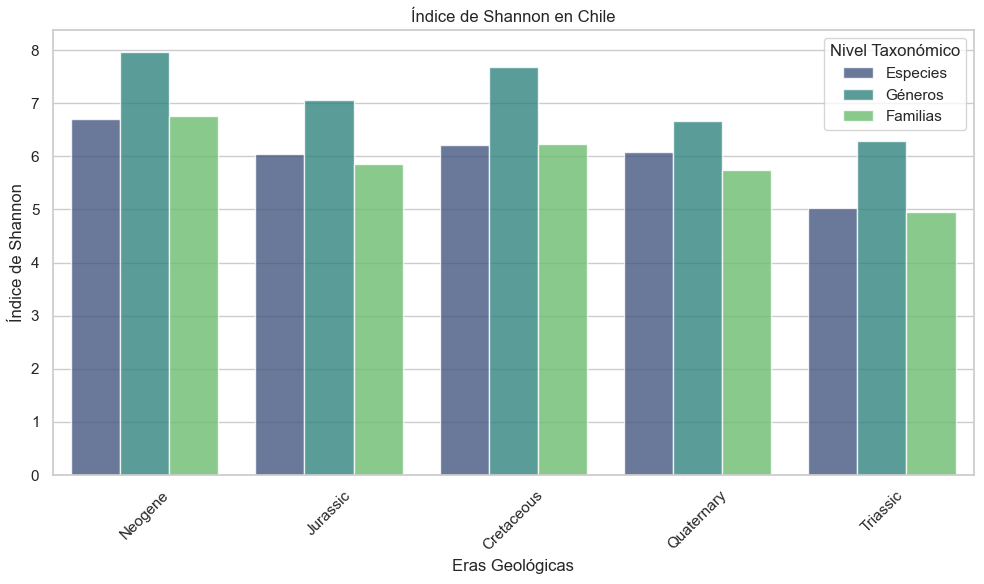

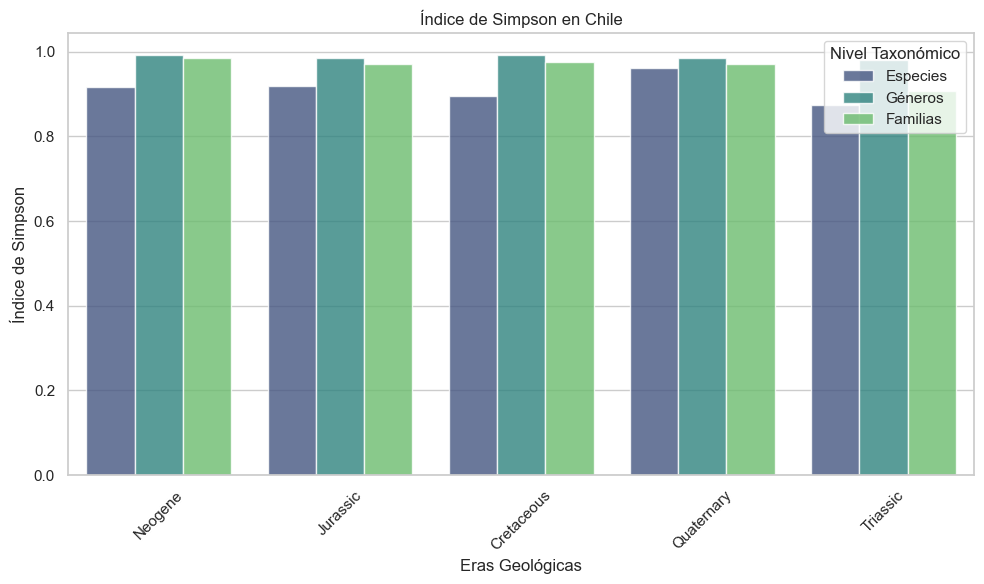

In [6]:
# Preparar los datos para visualización
df_especies = pd.DataFrame(indices_chile_especies).T
df_generos = pd.DataFrame(indices_chile_generos).T
df_familias = pd.DataFrame(indices_chile_familias).T

# Añadir nivel taxonómico
df_especies['Nivel'] = 'Especies'
df_generos['Nivel'] = 'Géneros'
df_familias['Nivel'] = 'Familias'

# Combinar todos los niveles taxonómicos
df_total_chile = pd.concat([df_especies, df_generos, df_familias])
df_total_chile.reset_index(inplace=True)
df_total_chile.rename(columns={'index': 'Era'}, inplace=True)

# Configurar gráficos separados
sns.set_theme(style="whitegrid")

# Histograma Shannon
plt.figure(figsize=(10, 6))
sns.barplot(data=df_total_chile,x='Era', y='Shannon', hue='Nivel',palette='viridis', alpha=0.8)
plt.title('Índice de Shannon en Chile')
plt.xlabel('Eras Geológicas')
plt.ylabel('Índice de Shannon')
plt.legend(title='Nivel Taxonómico')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Histograma Simpson
plt.figure(figsize=(10, 6))
sns.barplot(data=df_total_chile,x='Era', y='Simpson', hue='Nivel',palette='viridis', alpha=0.8)
plt.title('Índice de Simpson en Chile')
plt.xlabel('Eras Geológicas')
plt.ylabel('Índice de Simpson')
plt.legend(title='Nivel Taxonómico')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




### Observaciones 

1. **Neogene como la era más diversa**:
   - El **Neogene** destaca como la era con mayor cantidad de **especies únicas** en Chile, lo que se refleja en los índices más altos de Shannon y Simpson en todos los niveles taxonómicos (especies, géneros y familias).
   - Esto sugiere un período de gran biodiversidad fósil, posiblemente asociado a eventos evolutivos o condiciones ambientales favorables.

2. **Cretaceous con alta diversidad**:
   - Aunque no alcanza el nivel del Neogene, el **Cretaceous** también presenta índices de biodiversidad elevados, especialmente en géneros.

3. **Triassic con menor diversidad**:
   - El **Triassic** muestra los valores más bajos en ambos índices, lo que indica una biodiversidad limitada en esta era.

4. **Consistencia en la distribución**:
   - El índice de Simpson cercano a 1 en todas las eras sugiere que la distribución entre especies, géneros y familias es relativamente equitativa.

---




## Argentina


In [7]:
argentina_df.dropna(subset=['species_name', 'genus', 'family'], inplace=True)

In [8]:
# Seleccionar las top 5 eras con más especies únicas
top5_argentina_especies = argentina_df.groupby('era_early')['species_name'].nunique().nlargest(5)

# Mostrar las top 5 eras
print("Top 5 eras por especies únicas en Argentina:")
print(top5_argentina_especies)


Top 5 eras por especies únicas en Argentina:
era_early
Paleogene     1508
Neogene       1297
Cretaceous    1231
Ordovician     522
Jurassic       455
Name: species_name, dtype: int64


## Cálculo de Índices de Biodiversidad

A continuación, calcularemos los índices de biodiversidad **Shannon** y **Simpson** para las top 5 eras seleccionadas en Argentina a cada nivel taxonómico (especies, géneros y familias).


In [9]:
# Calcular índices para los niveles taxonómicos (especies, géneros, familias)
indices_argentina_especies = calcular_indices(argentina_df, top5_argentina_especies, 'species_name')
indices_argentina_generos = calcular_indices(argentina_df, top5_argentina_especies, 'genus')  # Misma top 5
indices_argentina_familias = calcular_indices(argentina_df, top5_argentina_especies, 'family')  # Misma top 5

# Mostrar resultados
print("\nÍndices por especies en argentina:")
print(pd.DataFrame(indices_argentina_especies).T)

print("\nÍndices por géneros en argentina:")
print(pd.DataFrame(indices_argentina_generos).T)

print("\nÍndices por familias en argentina:")
print(pd.DataFrame(indices_argentina_familias).T)


Índices por especies en argentina:
             Shannon   Simpson
Paleogene   8.544585  0.972890
Neogene     8.028244  0.950195
Cretaceous  7.962777  0.953910
Ordovician  6.381912  0.897559
Jurassic    6.841167  0.954667

Índices por géneros en argentina:
             Shannon   Simpson
Paleogene   9.091181  0.996431
Neogene     8.916679  0.996107
Cretaceous  9.091962  0.996489
Ordovician  7.958738  0.990973
Jurassic    7.969151  0.993136

Índices por familias en argentina:
             Shannon   Simpson
Paleogene   6.251061  0.932428
Neogene     6.269807  0.963560
Cretaceous  6.070854  0.922424
Ordovician  5.920015  0.953569
Jurassic    6.016167  0.968263


## Visualización de Índices de Biodiversidad en Argentina

A continuación, graficaremos los índices de biodiversidad **Shannon** y **Simpson** para las top 5 eras seleccionadas en Argentina, comparando los diferentes niveles taxonómicos.


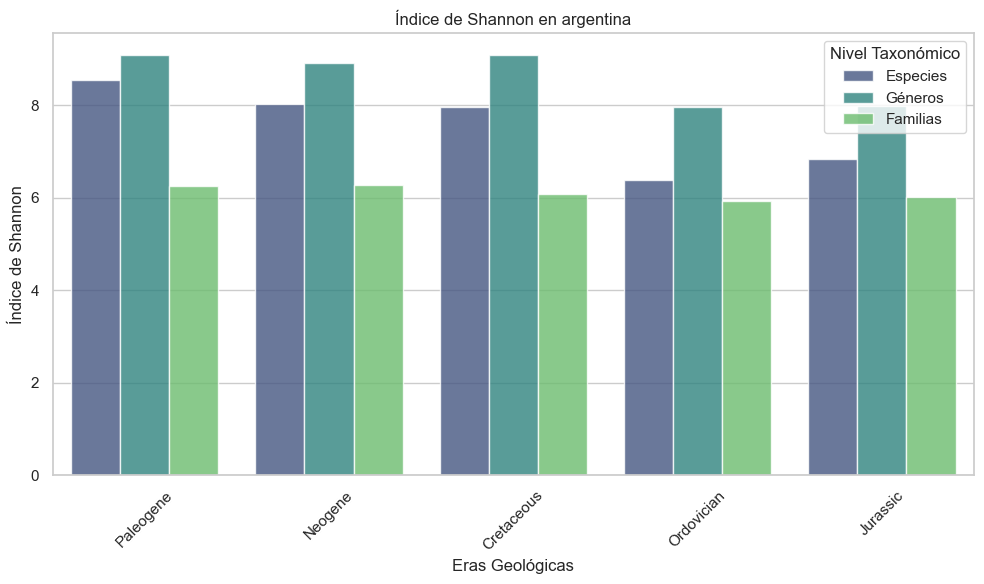

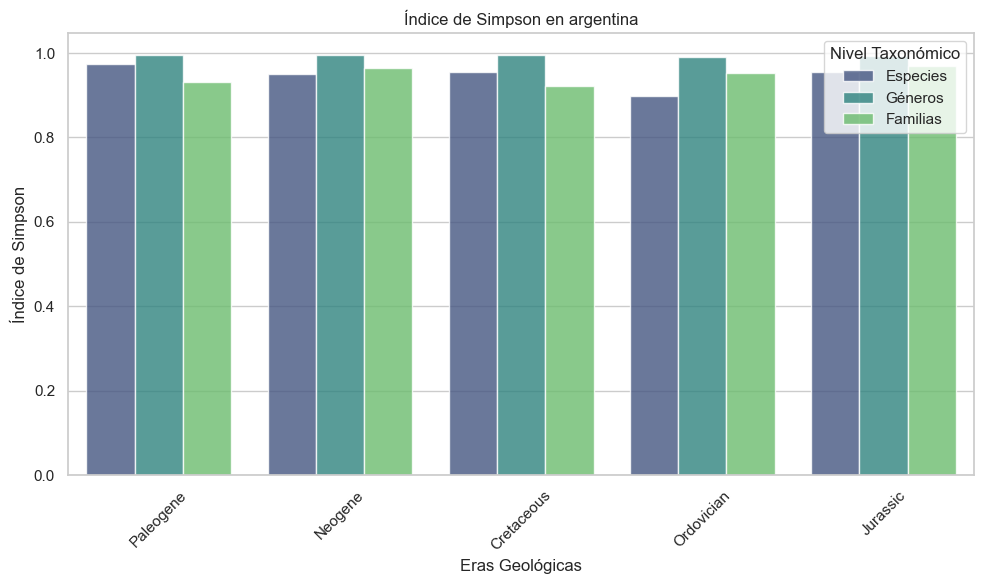

In [10]:
# Preparar los datos para visualización
df_especies = pd.DataFrame(indices_argentina_especies).T
df_generos = pd.DataFrame(indices_argentina_generos).T
df_familias = pd.DataFrame(indices_argentina_familias).T

# Añadir nivel taxonómico
df_especies['Nivel'] = 'Especies'
df_generos['Nivel'] = 'Géneros'
df_familias['Nivel'] = 'Familias'

# Combinar todos los niveles taxonómicos
df_total_argentina = pd.concat([df_especies, df_generos, df_familias])
df_total_argentina.reset_index(inplace=True)
df_total_argentina.rename(columns={'index': 'Era'}, inplace=True)

# Configurar gráficos separados
sns.set_theme(style="whitegrid")

# Histograma Shannon
plt.figure(figsize=(10, 6))
sns.barplot(data=df_total_argentina, x='Era', y='Shannon', hue='Nivel', palette='viridis', alpha=0.8)
plt.title('Índice de Shannon en argentina')
plt.xlabel('Eras Geológicas')
plt.ylabel('Índice de Shannon')
plt.legend(title='Nivel Taxonómico')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Histograma Simpson
plt.figure(figsize=(10, 6))
sns.barplot(data=df_total_argentina, x='Era', y='Simpson', hue='Nivel',palette='viridis', alpha=0.8)
plt.title('Índice de Simpson en argentina')
plt.xlabel('Eras Geológicas')
plt.ylabel('Índice de Simpson')
plt.legend(title='Nivel Taxonómico')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




### Observaciones

1. **Paleogene y Cretaceous destacan en diversidad**:
   - **Paleogene** y **Cretaceous** muestran los índices de Shannon más altos, indicando una mayor diversidad taxonómica en estas eras.
   - Esto es consistente tanto para especies como para géneros y familias.

2. **Neogene con diversidad moderada**:
   - Aunque el **Neogene** tiene índices elevados, no alcanza el nivel de diversidad observado en el **Paleogene** y **Cretaceous**.
   - Esto contrasta con los resultados de Chile, donde el Neogene era la era más diversa.

3. **Ordovician con menor diversidad**:
   - La era **Ordovician** presenta los índices de Shannon más bajos en todos los niveles taxonómicos (especies, géneros, familias), lo que sugiere una biodiversidad más limitada durante este período.

4. **Equitatividad alta en todas las eras**:
   - El índice de Simpson es consistentemente alto (cercano a 1) en todas las eras, lo que indica una distribución equitativa entre los grupos taxonómicos.

5. **Consistencia entre niveles taxonómicos**:
   - Aunque los valores absolutos difieren, los patrones generales de biodiversidad son similares para especies, géneros y familias. Esto sugiere que la estructura taxonómica se mantiene coherente entre niveles.


---


## Antartica

In [11]:
antartica_df.dropna(subset=['species_name', 'genus', 'family'], inplace=True)

In [12]:
# Seleccionar las top 5 eras con más especies únicas
top5_antartica_especies = antartica_df.groupby('era_early')['species_name'].nunique().nlargest(5)

# Mostrar las top 5 eras
print("Top 5 eras por especies únicas en antartica:")
print(top5_antartica_especies)


Top 5 eras por especies únicas en antartica:
era_early
Cretaceous    819
Paleogene     631
Jurassic      266
Cambrian      151
Neogene        79
Name: species_name, dtype: int64


## Cálculo de Índices de Biodiversidad

A continuación, calcularemos los índices de biodiversidad **Shannon** y **Simpson** para las top 5 eras seleccionadas en Antartica a cada nivel taxonómico (especies, géneros y familias).


In [13]:
# Calcular índices para los niveles taxonómicos (especies, géneros, familias)
indices_antartica_especies = calcular_indices(antartica_df, top5_antartica_especies, 'species_name')
indices_antartica_generos = calcular_indices(antartica_df, top5_antartica_especies, 'genus')  # Misma top 5
indices_antartica_familias = calcular_indices(antartica_df, top5_antartica_especies, 'family')  # Misma top 5

# Mostrar resultados
print("\nÍndices por especies en antartica:")
print(pd.DataFrame(indices_antartica_especies).T)

print("\nÍndices por géneros en antartica:")
print(pd.DataFrame(indices_antartica_generos).T)

print("\nÍndices por familias en antartica:")
print(pd.DataFrame(indices_antartica_familias).T)


Índices por especies en antartica:
             Shannon   Simpson
Cretaceous  7.774421  0.974170
Paleogene   7.982381  0.982278
Jurassic    6.811606  0.978307
Cambrian    6.056235  0.932599
Neogene     5.233813  0.912801

Índices por géneros en antartica:
             Shannon   Simpson
Cretaceous  8.212143  0.993433
Paleogene   7.835154  0.989796
Jurassic    6.404770  0.976696
Cambrian    7.168272  0.991198
Neogene     6.310020  0.982459

Índices por familias en antartica:
             Shannon   Simpson
Cretaceous  5.321553  0.907897
Paleogene   5.757675  0.927846
Jurassic    5.153073  0.945445
Cambrian    6.152271  0.978874
Neogene     5.627235  0.969219


## Visualización de Índices de Biodiversidad en Antartica

A continuación, graficaremos los índices de biodiversidad **Shannon** y **Simpson** para las top 5 eras seleccionadas en Antartica, comparando los diferentes niveles taxonómicos.


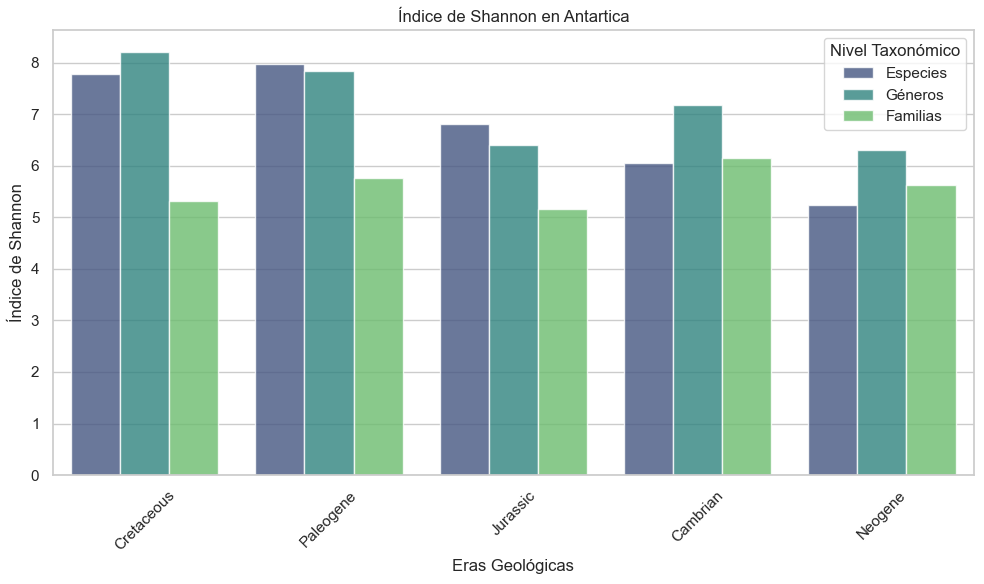

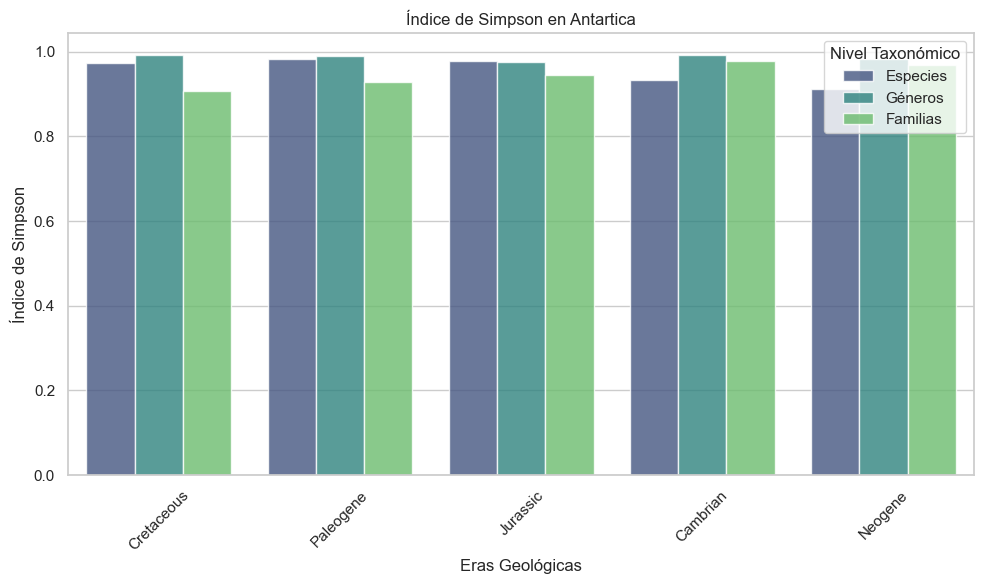

In [14]:
# Preparar los datos para visualización
df_especies = pd.DataFrame(indices_antartica_especies).T
df_generos = pd.DataFrame(indices_antartica_generos).T
df_familias = pd.DataFrame(indices_antartica_familias).T

# Añadir nivel taxonómico
df_especies['Nivel'] = 'Especies'
df_generos['Nivel'] = 'Géneros'
df_familias['Nivel'] = 'Familias'

# Combinar todos los niveles taxonómicos
df_total_antartica = pd.concat([df_especies, df_generos, df_familias])
df_total_antartica.reset_index(inplace=True)
df_total_antartica.rename(columns={'index': 'Era'}, inplace=True)

# Configurar gráficos separados
sns.set_theme(style="whitegrid")

# Histograma Shannon
plt.figure(figsize=(10, 6))
sns.barplot(data=df_total_antartica,x='Era', y='Shannon', hue='Nivel',palette='viridis', alpha=0.8)
plt.title('Índice de Shannon en Antartica')
plt.xlabel('Eras Geológicas')
plt.ylabel('Índice de Shannon')
plt.legend(title='Nivel Taxonómico')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Histograma Simpson
plt.figure(figsize=(10, 6))
sns.barplot(data=df_total_antartica,x='Era', y='Simpson', hue='Nivel',palette='viridis', alpha=0.8)
plt.title('Índice de Simpson en Antartica')
plt.xlabel('Eras Geológicas')
plt.ylabel('Índice de Simpson')
plt.legend(title='Nivel Taxonómico')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Observaciones 
1. **Cretaceous como la era más diversa**:
   - El **Cretaceous** muestra los índices de Shannon más altos, destacándose como la era más diversa en términos de especies, géneros y familias.
   - Esto es consistente con los patrones observados en otras regiones, pero aquí la diferencia es más marcada.

2. **Paleogene y Cambrian con alta diversidad**:
   - El **Paleogene** y el **Cambrian** también presentan índices de Shannon elevados, indicando una diversidad significativa en estas eras.
   - Particularmente en géneros, el Cambrian muestra una diversidad comparable a la del Paleogene.

3. **Quaternary con menor diversidad**:
   - El **Quaternary** tiene los índices de Shannon más bajos en todos los niveles taxonómicos, lo que sugiere una biodiversidad limitada en este período en la Antártida.

4. **Equitatividad alta en todas las eras**:
   - Al igual que en Chile y Argentina, el índice de Simpson es consistentemente alto (cercano a 1) en todas las eras, lo que indica una distribución equitativa entre los grupos taxonómicos.

5. **Distribución de diversidad entre niveles taxonómicos**:
   - Géneros suelen presentar los índices más altos, seguidos por familias, y especies suelen tener índices más bajos, lo que refleja una mayor riqueza y equitatividad en niveles taxonómicos más amplios.


## **Comparación entre Chile y Argentina en las eras comunes**


1. **Diversidad (Índice de Shannon)**:
   - Argentina muestra consistentemente una mayor diversidad en **especies** y **géneros** para todas las eras comunes.
   - Chile tiene una leve ventaja en la diversidad de **familias** durante **Neogene** y **Cretaceous**, pero Argentina lidera en **Jurassic**.

2. **Equitatividad (Índice de Simpson)**:
   - Argentina tiene una mejor distribución equitativa en **especies** y **géneros** en todas las eras.
   - Chile destaca en equitatividad a nivel de **familias**, particularmente en **Neogene** y **Cretaceous**.

3. **Patrones Generales**:
   - Argentina muestra una mayor diversidad taxonómica en niveles más detallados (especies y géneros), mientras que Chile presenta una diversidad más equilibrada en niveles más amplios (familias).
   - La equitatividad en Argentina sugiere ecosistemas más balanceados, mientras que en Chile podría haber dominancia de ciertos grupos.


## **Comparación entre Chile y Antártida en las eras comunes**

1. **Diversidad (Índice de Shannon)**:
   - En el **Cretaceous**, la Antártida tiene una mayor diversidad en especies y géneros, mientras que Chile lidera en familias.
   - En el **Jurassic**, Chile tiene una ventaja en géneros y familias, mientras que la Antártida lidera en especies.
   - En el **Quaternary**, Chile domina en todos los niveles taxonómicos.

2. **Equitatividad (Índice de Simpson)**:
   - La Antártida tiene una distribución más equitativa en el **Cretaceous** y **Jurassic**, especialmente en especies y géneros.
   - Chile muestra mayor equitatividad en el **Quaternary**, principalmente en especies y géneros.

3. **Patrones Generales**:
   - La Antártida tiende a mostrar una diversidad más alta en especies y géneros durante el **Cretaceous**, mientras que Chile tiene un dominio claro en el **Quaternary**.
   - A nivel de familias, Chile tiene consistentemente valores más altos de diversidad en todas las eras comunes, excepto en el **Jurassic**, donde están más equilibrados.

---


## **Comparación entre Argentina y Antártida en las eras comunes**

1. **Diversidad (Índice de Shannon)**:
   - Argentina domina claramente en **Paleogene** y **Jurassic** en todos los niveles taxonómicos (especies, géneros, familias).
   - En el **Cretaceous**, la Antártida tiene una mayor diversidad en especies y géneros, pero Argentina lidera en familias.

2. **Equitatividad (Índice de Simpson)**:
   - Argentina muestra una equitatividad consistentemente más alta en **Paleogene** y **Jurassic** en todos los niveles taxonómicos.
   - La Antártida tiene una ventaja en equitatividad en especies y géneros durante el **Cretaceous**.

3. **Patrones Generales**:
   - Argentina tiene un claro dominio en términos de diversidad y equitatividad en el **Paleogene** y el **Jurassic**.
   - La Antártida sobresale en especies y géneros durante el **Cretaceous**, lo que podría reflejar diferencias en la historia evolutiva y geológica de esta región.

---
